<a href="https://colab.research.google.com/github/Nidhi61101/Stockport-Predictive-Sentiment-Analysis/blob/main/MBTI_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries

import nltk
from nltk.corpus import stopwords
import nltk
import spacy
from nltk.stem.porter import PorterStemmer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nltk.download('stopwords')
set_stopwords = set(stopwords.words('english'))
#Lemmatizers
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df=pd.read_csv("/content/mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# **DATA VISUALIZATION**

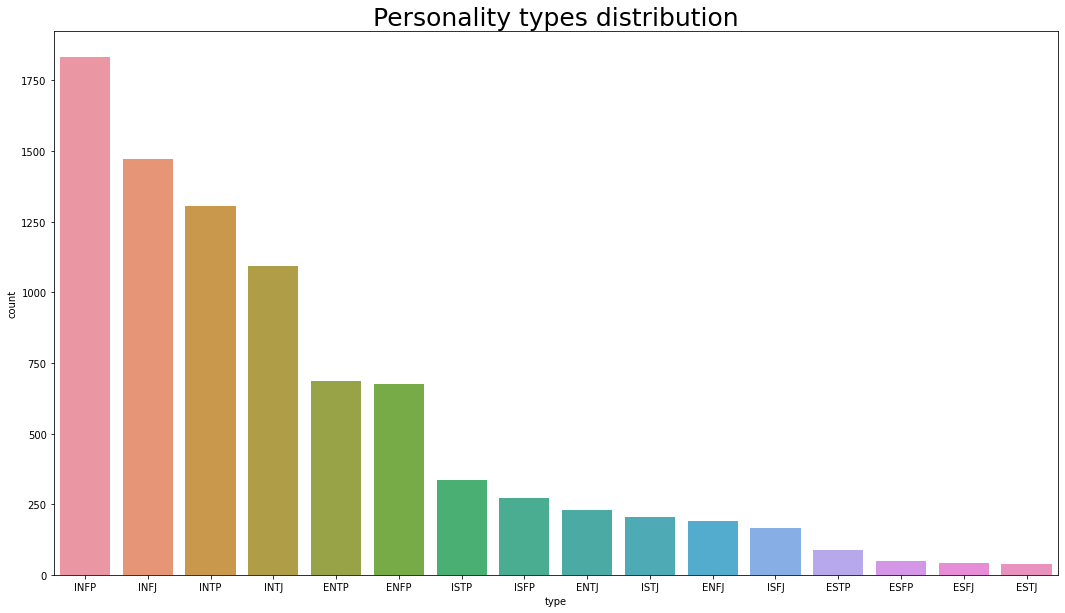

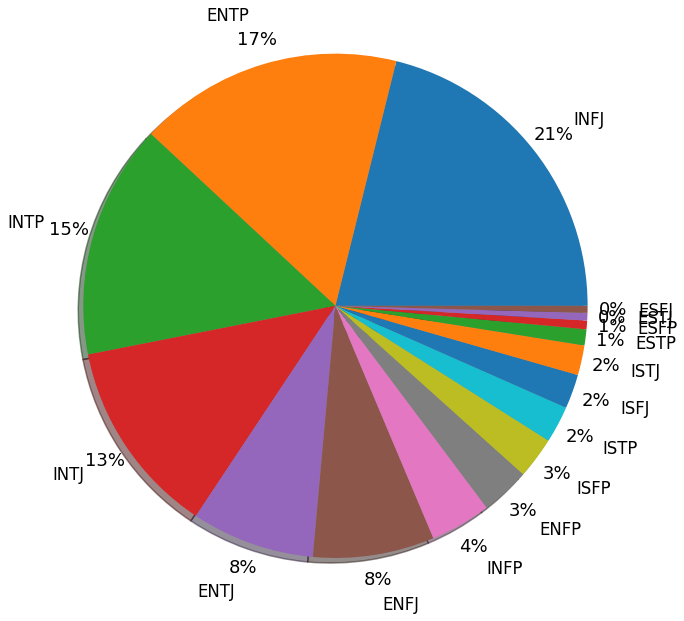

In [ ]:
#Plot to show above inference
plt.figure(figsize=(18,10))
sns.countplot(x='type', data=df, order=df.type.value_counts().index, orient='v')
sns.set_context('talk')
plt.title('Personality types distribution', fontsize=25)
plt.show()


plt.figure(figsize=(10, 10))
plt.pie(df.type.value_counts(),labels=df['type'].unique(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,shadow=True)
plt.axis('equal')
plt.show()

# **DATA PREPROCESSING**

In [ ]:
def cleantext(text):

    #convert to lower case
    text = text.lower()

    #Removing URLs
    text=re.sub(r'https?:\/\/.*?[\s+]', '', text.replace("|"," ") + " ")
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)

    #Removing multiple letters repeating words
    text=re.sub(r'([a-z])\1{2,}[\s|\w]*','',text)

    #Removing words that contain digit
    #text = re.sub('[^a-z\s]','',text)

    #Removing paranthesis
    text=re.sub('(\[|\()*\d+(\]|\))*', ' ', text)

    #Removing more than one space
    text=re.sub(' +', ' ', text)

    #Convert string to list
    list_words = text.split(' ')

    #Remove Stopwords
    text = []
    for word in list_words:
      if word not in set_stopwords:
        text.append(wordnet.lemmatize(word))

    #Convert list back to string
    text = ' '.join(text)
    return text

In [ ]:
df['posts'] = df['posts'].apply(cleantext)
df.head()

,type,posts
0,INFJ,' enfp intj moment sportscenter top ten play p...
1,ENTP,'i'm finding lack post alarming. sex boring po...
2,INTP,"'good one _____ course, say know; that's bless..."
3,INTJ,"'dear intp, enjoyed conversation day. esoteric..."
4,ENTJ,'you're fired. that's another silly misconcept...


In [ ]:
#Grouping the personalities into 4 major groups

map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
#Finding http links,music,questions,images,exclamatory marks,ellipsis per comment to gain more insight on the personality

df['http_pc'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_pc'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_pc'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_pc'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_pc'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_pc'] = df['posts'].apply(lambda x: x.count('...')/50)
print(len(df.columns))

12


# **BUILDING ML MODEL**

In [ ]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

In [ ]:
print(X.shape)
print(y.shape)

(8675, 6)
(8675,)


In [ ]:
#Splitting data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6940, 6)
(1735, 6)
(6940,)
(1735,)


# **ML MODELS ON COLUMNS**

In [ ]:
#Introversion/Extroversion
X_ie = df.drop(['type','posts','I-E'], axis=1).values
y_ie = df['I-E'].values
Xie_train,Xie_test,yie_train,yie_test=train_test_split(X_ie,y_ie,test_size = 0.2, random_state=5)


#RANDOM FOREST
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xie_train, yie_train)

Yie_pred = rfc.predict(Xie_test)

rfc.score(Xie_train, yie_train)#Score accuracy
acc_rfcie = round(rfc.score(Xie_train, yie_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_rfcie,2,), "%")


#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xie_train, yie_train)

Yie_pred = knn.predict(Xie_test)

acc_knnie = round(knn.score(Xie_train, yie_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnie,2,), "%")

Random Forest Predictions Model 99.19 %
Knn neighbor prediction value 83.26 %


In [ ]:
#Intuitive/Sensing 
X_ns = df.drop(['type','posts','N-S'], axis=1).values
y_ns = df['N-S'].values
Xns_train,Xns_test,yns_train,yns_test=train_test_split(X_ns,y_ns,test_size = 0.2, random_state=5)


#RANDOM FOREST
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xns_train, yns_train)

Y_predns = rfc.predict(Xns_test)

rfc.score(Xns_train, yns_train)
acc_rfcns = round(rfc.score(Xns_train, yns_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_rfcns,2,), "%")


#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xns_train, yns_train)

Y_predns = knn.predict(Xns_test)

acc_knnns = round(knn.score(Xns_train, yns_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnns,2,), "%")

Random Forest Predictions Model 99.38 %
Knn neighbor prediction value 88.46 %


In [ ]:
#Thinking/Feeling
X_tf = df.drop(['type','posts','T-F'], axis=1).values
y_tf = df['T-F'].values
Xtf_train,Xtf_test,ytf_train,ytf_test=train_test_split(X_tf,y_tf,test_size = 0.1, random_state=5)


#RANDOM FOREST
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtf_train, ytf_train)

Y_predtf = rfc.predict(Xtf_test)

rfc.score(Xtf_train, ytf_train)
acc_rfctf = round(rfc.score(Xtf_train, ytf_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_rfctf,2,), "%")


#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xtf_train, ytf_train)

Y_predtf = knn.predict(Xtf_test)

acc_knntf = round(knn.score(Xtf_train, ytf_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knntf,2,), "%")

Random Forest Predictions Model 98.18 %
Knn neighbor prediction value 78.22 %


In [ ]:
#Judging/Perceiving 
X_jp = df.drop(['type','posts','J-P'], axis=1).values
y_jp = df['J-P'].values
Xjp_train,Xjp_test,yjp_train,yjp_test=train_test_split(X_jp,y_jp,test_size = 0.1, random_state=5)


#RANDOM FOREST
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xjp_train, yjp_train)

Y_predjp = rfc.predict(Xjp_test)

rfc.score(Xjp_train, yjp_train)
acc_rfcjp = round(rfc.score(Xjp_train, yjp_train) * 100, 2)
print("Random Forest Predictions Model",round(acc_rfcjp,2,), "%")


#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xjp_train, yjp_train)

Y_predjp = knn.predict(Xjp_test)

acc_knnjp = round(knn.score(Xjp_train, yjp_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnjp,2,), "%")

Random Forest Predictions Model 98.3 %
Knn neighbor prediction value 76.98 %


Text(0, 0.5, 'Efficiency (in %)')

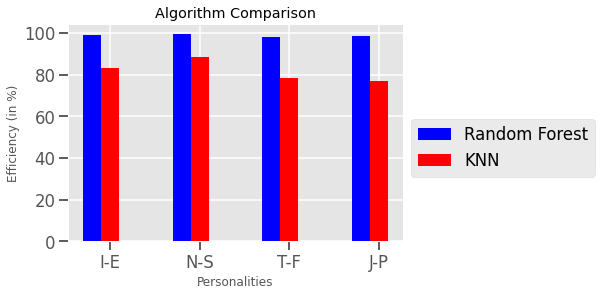

In [ ]:
#Visualization of different accuracies
plt.style.use('ggplot')
plt.plot()
x = np.arange(4)

y1=round(acc_rfcie,2),round(acc_rfcns,2),round(acc_rfctf,2),round(acc_rfcjp,2)
y2=round(acc_knnie,2),round(acc_knnns,2),round(acc_knntf,2),round(acc_knnjp,2)
width = 0.2
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x , y2, width, color='red')
#plt.bar(x +0.2, y3, width, color='green')

plt.title("Algorithm Comparison")
plt.legend(["Random Forest","KNN"],loc="upper left", bbox_to_anchor = (1.0,0.6))
plt.xticks(x, ["I-E", "N-S", "T-F", "J-P"])

plt.xlabel("Personalities")
plt.ylabel("Efficiency (in %)")